This notebook is a continuation of the notebooks CalibrationV3 and CalibrationV4. It gives an overview of both LR and RF regression performed on the PXD001468 and PXD032235 subset mzML files and gives some visualizations.

LOAD PXD001468 (linear) & PXD030035 (non-linear)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
linear_data = 'b1948_293T_proteinID_12B_QE3_122212.tsv'
non_linear_data = '20210120_HM_HEK_IAA_300minGr_R1.tsv' 
lin_df = pd.read_csv(linear_data, sep='\t')
nonlin_df = pd.read_csv(non_linear_data, sep='\t')

In [2]:
dimensions_lin = lin_df.shape
print(dimensions_lin)
dimensions_nonlin = nonlin_df.shape
print(dimensions_nonlin)

(40002, 36)
(60108, 36)


In [3]:
lin_df_q = lin_df[lin_df["spectrum_q"] < 0.01]
dimensions_lin_q = lin_df_q.shape
print(dimensions_lin_q)
nonlin_df_q = nonlin_df[nonlin_df["spectrum_q"] < 0.01]
dimensions_nonlin_q = nonlin_df_q.shape
print(dimensions_nonlin_q)

(20442, 36)
(46806, 36)


In [4]:
# Calculate exp_m/z, calc_m/z, and m/z_difference for lin_df_q
lin_df_q.loc[:, 'exp_m/z'] = lin_df_q['expmass'] / lin_df_q['charge']
lin_df_q.loc[:, 'calc_m/z'] = lin_df_q['calcmass'] / lin_df_q['charge']
lin_df_q.loc[:, 'm/z_difference'] = lin_df_q['calc_m/z'] - lin_df_q['exp_m/z']

# Calculate exp_m/z, calc_m/z, and m/z_difference for nonlin_df_q
nonlin_df_q.loc[:, 'exp_m/z'] = nonlin_df_q['expmass'] / nonlin_df_q['charge']
nonlin_df_q.loc[:, 'calc_m/z'] = nonlin_df_q['calcmass'] / nonlin_df_q['charge']
nonlin_df_q.loc[:, 'm/z_difference'] = nonlin_df_q['calc_m/z'] - nonlin_df_q['exp_m/z']

/tmp/ipykernel_1644284/3804421817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_df_q.loc[:, 'exp_m/z'] = lin_df_q['expmass'] / lin_df_q['charge']
/tmp/ipykernel_1644284/3804421817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_df_q.loc[:, 'calc_m/z'] = lin_df_q['calcmass'] / lin_df_q['charge']
/tmp/ipykernel_1644284/3804421817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [5]:
lin_df_q.head(1)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.893,2,25,0,0.0,2.989617,2.100378,90.574402,62.170476,0.0,68.795135,0.329163,0.320285,0.008878,30,12,17,0.68,54.08571,7,-14.058395,3.668188,-324.0,0.000723,0.001377,0.002173,254438610.0,19130256.0,1102.44985,1102.4465,-0.00335


In [6]:
nonlin_df_q.head(1)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference
0,VSHVSTGGGASLELLEGK,tr|A0A140VJR3|A0A140VJR3_HUMAN,1,20210120_HM_HEK_IAA_300minGr_R1.mzML,controllerType=0 controllerNumber=1 scan=20762,1,1,1739.9047,1739.9056,2,18,0,0.0,0.561273,4.512378,80.898759,57.30625,0.0,106.39572,0.358235,0.444003,0.085768,28,7,15,0.833333,52.37099,27,-22.036961,3.05113,-324.0,0.000159,0.000292,0.001187,17372374.0,2015707.5,869.95235,869.9528,0.00045


Apply linear regression on both datasets

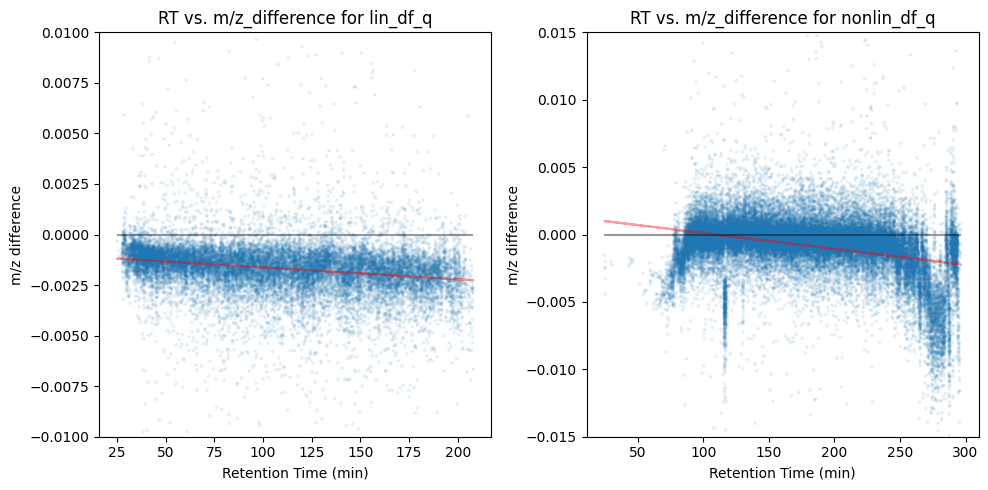

Slope for lin_df_q: -5.87864301356525e-06
Intercept for lin_df_q: -0.0010404717198749332
Slope for nonlin_df_q: -1.1812981416629081e-05
Intercept for nonlin_df_q: 0.001291879168543407


In [34]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot
axs[0].scatter(lin_df_q['rt'], lin_df_q['m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3)
x1 = lin_df_q['rt']
y1 = lin_df_q['m/z_difference']
coefficients1 = np.polyfit(x1, y1, 1)
polynomial1 = np.poly1d(coefficients1)
axs[0].plot(x1, polynomial1(x1), color='red', alpha=0.4)

# Get the x-range of the data in the first subplot
x1_range = lin_df_q['rt']

# Add horizontal black line at y=0 with the same x-range as the data in the first subplot
axs[0].hlines(0, min(x1_range), max(x1_range), colors='black', alpha=0.4)

axs[0].set_ylim(-0.01, 0.01)
axs[0].set_xlabel('Retention Time (min)')
axs[0].set_ylabel('m/z difference')
axs[0].set_title('RT vs. m/z_difference for lin_df_q')

# Second subplot
axs[1].scatter(nonlin_df_q['rt'], nonlin_df_q['m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3)
x2 = nonlin_df_q['rt']
y2 = nonlin_df_q['m/z_difference']
coefficients2 = np.polyfit(x2, y2, 1)
polynomial2 = np.poly1d(coefficients2)
axs[1].plot(x2, polynomial2(x2), color='red', alpha=0.4)

# Get the x-range of the data in the second subplot
x2_range = nonlin_df_q['rt']

# Add horizontal black line at y=0 with the same x-range as the data in the second subplot
axs[1].hlines(0, min(x2_range), max(x2_range), colors='black', alpha=0.4)

axs[1].set_ylim(-0.015, 0.015)
axs[1].set_xlabel('Retention Time (min)')
axs[1].set_ylabel('m/z difference')
axs[1].set_title('RT vs. m/z_difference for nonlin_df_q')

plt.tight_layout()
plt.show()

# Get the coefficients
slope_lin, intercept_lin = coefficients1
slope_nonlin, intercept_nonlin = coefficients2
print("Slope for lin_df_q:", slope_lin)
print("Intercept for lin_df_q:", intercept_lin)
print("Slope for nonlin_df_q:", slope_nonlin)
print("Intercept for nonlin_df_q:", intercept_nonlin)

Apply linear regression function parameters to calibrate both datasets

In [8]:
lin_df_q.loc[:, 'm/z_difference_adjusted_lin'] = lin_df_q['m/z_difference'] - (lin_df_q['rt'] * slope_lin + intercept_lin)
nonlin_df_q.loc[:, 'm/z_difference_adjusted_lin'] = nonlin_df_q['m/z_difference'] - (nonlin_df_q['rt'] * slope_nonlin + intercept_nonlin)

/tmp/ipykernel_1644284/3222574242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_df_q.loc[:, 'm/z_difference_adjusted_lin'] = lin_df_q['m/z_difference'] - (lin_df_q['rt'] * slope_lin + intercept_lin)
/tmp/ipykernel_1644284/3222574242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonlin_df_q.loc[:, 'm/z_difference_adjusted_lin'] = nonlin_df_q['m/z_difference'] - (nonlin_df_q['rt'] * slope_nonlin + intercept_nonlin)


In [82]:
lin_df_q.loc[:, 'm/z_difference_predicted_lin'] = lin_df_q['rt'] * slope_lin + intercept_lin

/tmp/ipykernel_1644284/192638137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_df_q.loc[:, 'm/z_difference_predicted_lin'] = lin_df_q['rt'] * slope_lin + intercept_lin


In [83]:
lin_df_q.head(2)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,m/z_difference_adjusted_lin,m/z_difference_adjusted_RF,m/z_difference_predicted_RF,m/z_difference_predicted_lin
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.893,2,25,0,0.0,2.989617,2.100378,90.574402,62.170476,0.0,68.795135,0.329163,0.320285,0.008878,30,12,17,0.68,54.08571,7,-14.058395,3.668188,-324.0,0.000723,0.001377,0.002173,254438610.0,19130256.0,1102.44985,1102.4465,-0.00335,-0.001905,-0.000033,-0.003317,-0.001445
1,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19398,1,1,2204.8987,2204.893,2,25,0,0.0,2.546712,2.024363,87.335601,59.066865,0.0,68.121860,0.325942,0.320285,0.005657,28,6,17,0.68,51.46834,6,-12.166700,3.552844,-324.0,0.000723,0.001377,0.002173,685737100.0,48448784.0,1102.44935,1102.4465,-0.00285,-0.001409,0.000225,-0.003076,-0.001441


In [44]:
lin_df_q.head(1)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,m/z_difference_adjusted_lin
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.893,2,25,0,0.0,2.989617,2.100378,90.574402,62.170476,0.0,68.795135,0.329163,0.320285,0.008878,30,12,17,0.68,54.08571,7,-14.058395,3.668188,-324.0,0.000723,0.001377,0.002173,254438610.0,19130256.0,1102.44985,1102.4465,-0.00335,-0.001905


In [43]:
nonlin_df_q.head(1)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,m/z_difference_adjusted_lin
0,VSHVSTGGGASLELLEGK,tr|A0A140VJR3|A0A140VJR3_HUMAN,1,20210120_HM_HEK_IAA_300minGr_R1.mzML,controllerType=0 controllerNumber=1 scan=20762,1,1,1739.9047,1739.9056,2,18,0,0.0,0.561273,4.512378,80.898759,57.30625,0.0,106.39572,0.358235,0.444003,0.085768,28,7,15,0.833333,52.37099,27,-22.036961,3.05113,-324.0,0.000159,0.000292,0.001187,17372374.0,2015707.5,869.95235,869.9528,0.00045,0.000415


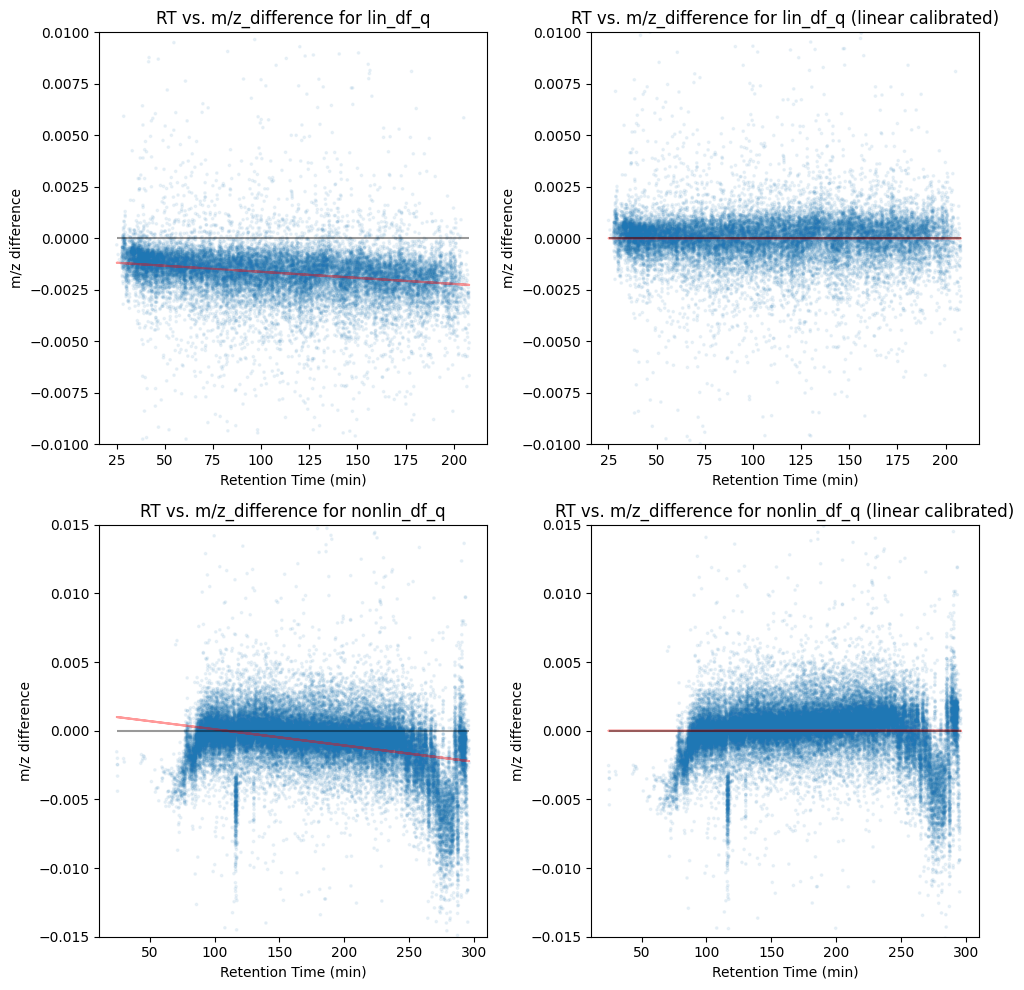

In [37]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2 rows, 2 columns



# FIRST SUBPLOT (TOP LEFT)
axs[0, 0].scatter(lin_df_q['rt'], lin_df_q['m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3)
x1 = lin_df_q['rt']
y1 = lin_df_q['m/z_difference']
coefficients1 = np.polyfit(x1, y1, 1)
polynomial = np.poly1d(coefficients1)
axs[0, 0].plot(x1, polynomial(x1), color='red', alpha=0.4)

# Get the x-range of the data in the first subplot
x1_range = lin_df_q['rt']

# Add horizontal black line at y=0 with the same x-range as the data in the first subplot
axs[0, 0].hlines(0, min(x1_range), max(x1_range), colors='black', alpha=0.4)

axs[0, 0].set_ylim(-0.01, 0.01)
axs[0, 0].set_xlabel('Retention Time (min)')
axs[0, 0].set_ylabel('m/z difference')
axs[0, 0].set_title('RT vs. m/z_difference for lin_df_q')



# SECOND SUBPLOT (TOP RIGHT)
axs[0, 1].scatter(lin_df_q['rt'], lin_df_q['m/z_difference_adjusted_lin'], marker='o', linestyle='', alpha=0.075, s=3)
x1 = lin_df_q['rt']
y1 = lin_df_q['m/z_difference_adjusted_lin']
coefficients1 = np.polyfit(x1, y1, 1)
polynomial = np.poly1d(coefficients1)
axs[0, 1].plot(x1, polynomial(x1), color='red', alpha=0.4)

# Get the x-range of the data in the second subplot
x2_range = lin_df_q['rt']

# Add horizontal black line at y=0 with the same x-range as the data in the second subplot
axs[0, 1].hlines(0, min(x2_range), max(x2_range), colors='black', alpha=0.4)

axs[0, 1].set_ylim(-0.01, 0.01)
axs[0, 1].set_xlabel('Retention Time (min)')
axs[0, 1].set_ylabel('m/z difference')
axs[0, 1].set_title('RT vs. m/z_difference for lin_df_q (linear calibrated)')



# THIRD SUBPLOT (BOTTOM LEFT)
axs[1, 0].scatter(nonlin_df_q['rt'], nonlin_df_q['m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3)
x3 = nonlin_df_q['rt']
y3 = nonlin_df_q['m/z_difference']
coefficients3 = np.polyfit(x3, y3, 1)
polynomial3 = np.poly1d(coefficients3)
axs[1, 0].plot(x3, polynomial3(x3), color='red', alpha=0.4)

# Get the x-range of the data in the third subplot
x3_range = nonlin_df_q['rt']

# Add horizontal black line at y=0 with the same x-range as the data in the third subplot
axs[1, 0].hlines(0, min(x3_range), max(x3_range), colors='black', alpha=0.4)

axs[1, 0].set_ylim(-0.015, 0.015)
axs[1, 0].set_xlabel('Retention Time (min)')
axs[1, 0].set_ylabel('m/z difference')
axs[1, 0].set_title('RT vs. m/z_difference for nonlin_df_q')



# FOURTH SUBPLOT (BOTTOM RIGHT)
axs[1, 1].scatter(nonlin_df_q['rt'], nonlin_df_q['m/z_difference_adjusted_lin'], marker='o', linestyle='', alpha=0.075, s=3)
x4 = nonlin_df_q['rt']
y4 = nonlin_df_q['m/z_difference_adjusted_lin']
coefficients4 = np.polyfit(x4, y4, 1)
polynomial4 = np.poly1d(coefficients4)
axs[1, 1].plot(x4, polynomial4(x4), color='red', alpha=0.4)

# Get the x-range of the data in the third subplot
x4_range = nonlin_df_q['rt']

# Add horizontal black line at y=0 with the same x-range as the data in the third subplot
axs[1, 1].hlines(0, min(x4_range), max(x4_range), colors='black', alpha=0.4)

axs[1, 1].set_ylim(-0.015, 0.015)
axs[1, 1].set_xlabel('Retention Time (min)')
axs[1, 1].set_ylabel('m/z difference')
axs[1, 1].set_title('RT vs. m/z_difference for nonlin_df_q (linear calibrated)')



plt.tight_layout()
plt.show()

RF regressor on both datasets

In [10]:
from pyteomics import mzml

linear_data_mzML = linear_data.replace('.tsv', '.mzML')
nonlinear_data_mzML = non_linear_data.replace('.tsv', '.mzML')

linear_spectra_list = []
non_linear_spectra_list = []

# Open the linear mzML file for reading
with mzml.read(linear_data_mzML) as reader:
    # Iterate over each spectrum in the linear mzML file
    for spectrum in reader:
        # Append the spectrum to the list
        linear_spectra_list.append(spectrum)

# Print the number of spectra read
print("Number of spectra read (linear):", len(linear_spectra_list))

# Open the non-linear mzML file for reading
with mzml.read(nonlinear_data_mzML) as reader:
    # Iterate over each spectrum in the non-linear mzML file
    for spectrum in reader:
        # Append the spectrum to the list
        non_linear_spectra_list.append(spectrum)
        
# Print the number of spectra read
print("Number of spectra read (non-linear):", len(non_linear_spectra_list))

Number of spectra read (linear): 77338
Number of spectra read (non-linear): 89175


In [50]:
# Create an empty DataFrame lin_df_q_RF
lin_df_q_RF_columns = ['m/z value', 'Retention time', 'Total ion count', 'Injection time', 'm/z difference']
lin_df_q_RF = pd.DataFrame(columns=lin_df_q_RF_columns)

for index, row in lin_df_q.iterrows():
    scannr_value = int(lin_df_q.loc[index, 'scannr'].split("scan=")[-1]) -1
    spec2analyze = linear_spectra_list[scannr_value]
    total_ion_count = spec2analyze['total ion current']
    injection_time = spec2analyze['scanList']['scan'][0]['ion injection time']
    m_z_value = row['exp_m/z']
    retention_time = row['rt']
    m_z_error = row['m/z_difference']
    
    # Append extracted values as a new row to lin_df_q_RF using loc
    lin_df_q_RF.loc[len(lin_df_q_RF)] = [m_z_value, retention_time, total_ion_count, injection_time, m_z_error]

print(len(lin_df_q_RF))
lin_df_q_RF.head(5)

20442


,m/z value,Retention time,Total ion count,Injection time,m/z difference
0,1102.449850,68.795135,41903680.0,23.761,-0.003350
1,1102.449350,68.121860,111639620.0,9.655,-0.002850
2,636.595867,58.068718,11568656.0,60.000,-0.001633
3,954.894250,58.315502,44942156.0,11.030,-0.002900
4,932.990350,150.484760,11241249.0,50.115,-0.002800


In [49]:
# Create an empty DataFrame nonlin_df_q_RF
nonlin_df_q_RF_columns = ['m/z value', 'Retention time', 'Total ion count', 'Injection time', 'm/z difference']
nonlin_df_q_RF = pd.DataFrame(columns=nonlin_df_q_RF_columns)

for index, row in nonlin_df_q.iterrows():
    scannr_value = int(nonlin_df_q.loc[index, 'scannr'].split("scan=")[-1]) -1
    spec2analyze = non_linear_spectra_list[scannr_value]
    total_ion_count = spec2analyze['total ion current']
    injection_time = spec2analyze['scanList']['scan'][0]['ion injection time']
    m_z_value = row['exp_m/z']
    retention_time = row['rt']
    m_z_error = row['m/z_difference']
    
    # Append extracted values as a new row to nonlin_df_q_RF using loc
    nonlin_df_q_RF.loc[len(nonlin_df_q_RF)] = [m_z_value, retention_time, total_ion_count, injection_time, m_z_error]
    
print(len(nonlin_df_q_RF))
nonlin_df_q_RF.head(5)

46806


,m/z value,Retention time,Total ion count,Injection time,m/z difference
0,869.952350,106.39572,3987641.5,110.302,0.00045
1,752.641675,206.77390,151422590.0,5.189,-0.00110
2,752.640575,207.29668,27206810.0,18.045,0.00000
3,1072.995500,128.34155,2356752.0,120.000,0.00085
4,1185.129500,292.91214,48723524.0,52.502,-0.00070


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data1 = lin_df_q_RF

# Split the dataset into features (X) and labels (y)
X1 = data1.drop(columns=['m/z difference'])  # Features
y1 = data1['m/z difference']  # Labels

# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf_regressor1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor1.fit(X1_train, y1_train)

# Perform cross-validated predictions
y1_cv_pred = cross_val_predict(rf_regressor1, X1, y1, cv=5)

# Predict the labels for the test set
y1_pred = rf_regressor1.predict(X1_test)

# Calculate and print the Mean Squared Error (MSE) of the model
mse1 = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error (MSE) on Test Set:", mse1)

# Calculate and print the Mean Squared Error (MSE) of cross-validated predictions
cv_mse1 = mean_squared_error(y1, y1_cv_pred)
print("Mean Squared Error (MSE) on Cross-Validation Predictions:", cv_mse1)

Mean Squared Error (MSE) on Test Set: 1.7238564186723193e-06
Mean Squared Error (MSE) on Cross-Validation Predictions: 1.9378842103298315e-06


In [59]:
# Selecting only the first four columns of lin_df_q
lin_df_q_RF_subset = lin_df_q_RF[['m/z value', 'Retention time', 'Total ion count', 'Injection time']]

# Predict using the subset of data
lin_pred = rf_regressor1.predict(lin_df_q_RF_subset)
print(len(lin_pred))


20442


In [62]:

# Adding the predictions as a new column to lin_df_q
lin_df_q['m/z_difference_predicted_RF'] = lin_pred

/tmp/ipykernel_1644284/449552215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_df_q['m/z_difference_predicted_RF'] = lin_pred


In [63]:
lin_df_q.head(1)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,m/z_difference_adjusted_lin,m/z_difference_adjusted_RF,m/z_difference_predicted_RF
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.893,2,25,0,0.0,2.989617,2.100378,90.574402,62.170476,0.0,68.795135,0.329163,0.320285,0.008878,30,12,17,0.68,54.08571,7,-14.058395,3.668188,-324.0,0.000723,0.001377,0.002173,254438610.0,19130256.0,1102.44985,1102.4465,-0.00335,-0.001905,-0.003317,-0.003317


In [64]:
# Adding the predictions as a new column to lin_df_q
lin_df_q['m/z_difference_adjusted_RF'] = lin_df_q['m/z_difference'] - lin_df_q['m/z_difference_predicted_RF']

/tmp/ipykernel_1644284/2787047681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_df_q['m/z_difference_adjusted_RF'] = lin_df_q['m/z_difference'] - lin_df_q['m/z_difference_predicted_RF']


In [65]:
lin_df_q.head(1)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,m/z_difference_adjusted_lin,m/z_difference_adjusted_RF,m/z_difference_predicted_RF
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.893,2,25,0,0.0,2.989617,2.100378,90.574402,62.170476,0.0,68.795135,0.329163,0.320285,0.008878,30,12,17,0.68,54.08571,7,-14.058395,3.668188,-324.0,0.000723,0.001377,0.002173,254438610.0,19130256.0,1102.44985,1102.4465,-0.00335,-0.001905,-0.000033,-0.003317


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data2 = nonlin_df_q_RF

# Split the dataset into features (X) and labels (y)
X2= data2.drop(columns=['m/z error'])  # Features
y2 = data2['m/z error']  # Labels

# Split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf_regressor2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor2.fit(X2_train, y2_train)

# Predict the labels for the test set
y2_pred = rf_regressor2.predict(X2_test)

# Calculate and print the Mean Squared Error (MSE) of the model
mse2 = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error (MSE):", mse2)

Mean Squared Error (MSE): 2.4907111804164468e-06


In [68]:
# Selecting only the first four columns of nonlin_df_q
nonlin_df_q_RF_subset = nonlin_df_q_RF[['m/z value', 'Retention time', 'Total ion count', 'Injection time']]

# Predict using the subset of data
nonlin_pred = rf_regressor2.predict(nonlin_df_q_RF_subset)
print(len(nonlin_pred))


46806


In [71]:
# Adding the predictions as a new column to nonlin_df_q
nonlin_df_q['m/z_difference_predicted_RF'] = nonlin_pred

/tmp/ipykernel_1644284/1929772130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonlin_df_q['m/z_difference_predicted_RF'] = nonlin_pred


In [72]:
nonlin_df_q.head(1)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,m/z_difference_adjusted_lin,m/z_difference_predicted_RF
0,VSHVSTGGGASLELLEGK,tr|A0A140VJR3|A0A140VJR3_HUMAN,1,20210120_HM_HEK_IAA_300minGr_R1.mzML,controllerType=0 controllerNumber=1 scan=20762,1,1,1739.9047,1739.9056,2,18,0,0.0,0.561273,4.512378,80.898759,57.30625,0.0,106.39572,0.358235,0.444003,0.085768,28,7,15,0.833333,52.37099,27,-22.036961,3.05113,-324.0,0.000159,0.000292,0.001187,17372374.0,2015707.5,869.95235,869.9528,0.00045,0.000415,0.000479


In [77]:
# Adding the predictions as a new column to lin_df_q
nonlin_df_q['m/z_difference_adjusted_RF'] = nonlin_df_q['m/z_difference'] - nonlin_df_q['m/z_difference_predicted_RF']

# Calculate residuals (predicted m/z error - original m/z difference)
residuals = nonlin_df_q['m/z_difference_predicted_RF'] - nonlin_df_q['m/z_difference']
# Add residuals to the original m/z difference values to obtain calibrated m/z difference values
nonlin_df_q['m/z_difference_adjusted_RFv2'] = nonlin_df_q['m/z_difference'] + residuals

/tmp/ipykernel_1644284/388877114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonlin_df_q['m/z_difference_adjusted_RF'] = nonlin_df_q['m/z_difference'] - nonlin_df_q['m/z_difference_predicted_RF']
/tmp/ipykernel_1644284/388877114.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonlin_df_q['m/z_difference_adjusted_RFv2'] = nonlin_df_q['m/z_difference'] + residuals


In [78]:
nonlin_df_q.head(1)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,m/z_difference_adjusted_lin,m/z_difference_predicted_RF,m/z_difference_adjusted_RF,m/z_difference_adjusted_RFv2
0,VSHVSTGGGASLELLEGK,tr|A0A140VJR3|A0A140VJR3_HUMAN,1,20210120_HM_HEK_IAA_300minGr_R1.mzML,controllerType=0 controllerNumber=1 scan=20762,1,1,1739.9047,1739.9056,2,18,0,0.0,0.561273,4.512378,80.898759,57.30625,0.0,106.39572,0.358235,0.444003,0.085768,28,7,15,0.833333,52.37099,27,-22.036961,3.05113,-324.0,0.000159,0.000292,0.001187,17372374.0,2015707.5,869.95235,869.9528,0.00045,0.000415,0.000479,-0.000029,0.000479


In [18]:
# Create an empty list
linear_data = []

# Iterate over spectra_list
for spectrum in linear_spectra_list:
    m_z_values = spectrum['m/z array']
    retention_time = spectrum['scanList']['scan'][0]['scan start time']
    total_ion_count = spectrum['total ion current']
    injection_time = spectrum['scanList']['scan'][0]['ion injection time']
    
    # Iterate over each m/z value in the spectrum
    for m_z_value in m_z_values:
        # Append a dictionary for each m/z value along with the corresponding metadata
        linear_data.append({
            'm/z value': m_z_value,
            'Retention time': retention_time,
            'Total ion count': total_ion_count,
            'Injection time': injection_time
        })

# Convert the list to a DataFrame
lin_df_q_RF_X = pd.DataFrame(linear_data)

print(len(lin_df_q_RF_X))
lin_df_q_RF_X.head(5)

53969277


,m/z value,Retention time,Total ion count,Injection time
0,300.541168,15.001921,15917656.0,52.613
1,300.909027,15.001921,15917656.0,52.613
2,300.925415,15.001921,15917656.0,52.613
3,300.941528,15.001921,15917656.0,52.613
4,300.958954,15.001921,15917656.0,52.613


In [19]:
# Create an empty list
non_linear_data = []

# Iterate over spectra_list
for spectrum in non_linear_spectra_list:
    m_z_values = spectrum['m/z array']
    retention_time = spectrum['scanList']['scan'][0]['scan start time']
    total_ion_count = spectrum['total ion current']
    injection_time = spectrum['scanList']['scan'][0]['ion injection time']
    
    # Iterate over each m/z value in the spectrum
    for m_z_value in m_z_values:
        # Append a dictionary for each m/z value along with the corresponding metadata
        non_linear_data.append({
            'm/z value': m_z_value,
            'Retention time': retention_time,
            'Total ion count': total_ion_count,
            'Injection time': injection_time
        })

# Convert the list to a DataFrame
non_lin_df_q_RF_X = pd.DataFrame(non_linear_data)

print(len(non_lin_df_q_RF_X))
non_lin_df_q_RF_X.head(5)

63830554


,m/z value,Retention time,Total ion count,Injection time
0,300.064758,0.008503,25481468.0,303.462
1,300.082764,0.008503,25481468.0,303.462
2,300.293488,0.008503,25481468.0,303.462
3,300.301117,0.008503,25481468.0,303.462
4,300.858368,0.008503,25481468.0,303.462


In [25]:
#Function definitions
def get_x(spectrum):
    mz_values = spectrum['m/z array']
    retention_time = spectrum['scanList']['scan'][0]['scan start time']
    total_ion_count = spectrum['total ion current']
    injection_time = spectrum['scanList']['scan'][0]['ion injection time']
    x = [[mz_value, retention_time, total_ion_count, injection_time] for mz_value in mz_values]
    return x

def RF_calibrate_ms_LINdata(spectrum):
    mz_values = spectrum['m/z array']
    x = get_x(spectrum)
    # Apply the calibration function to the m/z values
    calibrated_mz_values = np.array(mz_values) + np.array(rf_regressor1.predict(x))
    
    # Replace the original m/z values with the calibrated ones
    spectrum['m/z array'] = calibrated_mz_values   
    return spectrum

def RF_calibrate_ms_nonLINdata(spectrum):
    mz_values = spectrum['m/z array']
    x = get_x(spectrum)
    # Apply the calibration function to the m/z values
    calibrated_mz_values = np.array(mz_values) + np.array(rf_regressor2.predict(x))
    
    # Replace the original m/z values with the calibrated ones
    spectrum['m/z array'] = calibrated_mz_values   
    return spectrum


In [26]:
import warnings

# Suppress UserWarning about feature names
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
from psims.transform.mzml import MzMLTransformer, cvstr

linear_data_mzML_Calibrated = linear_data_mzML.replace('.mzML', '_Calibrated_RF.mzML')   

with open(linear_data_mzML, 'rb') as in_stream, open(linear_data_mzML_Calibrated, 'wb') as out_stream:
    MzMLTransformer(in_stream, out_stream, RF_calibrate_ms_LINdata).write()

Handled 0 spectra
Handled 1000 spectra
Handled 2000 spectra
Handled 3000 spectra
Handled 4000 spectra
Handled 5000 spectra
Handled 6000 spectra
Handled 7000 spectra
Handled 8000 spectra
Handled 9000 spectra
Handled 10000 spectra
Handled 11000 spectra
Handled 12000 spectra
Handled 13000 spectra
Handled 14000 spectra
Handled 15000 spectra
Handled 16000 spectra
Handled 17000 spectra
Handled 18000 spectra
Handled 19000 spectra
Handled 20000 spectra
Handled 21000 spectra
Handled 22000 spectra
Handled 23000 spectra
Handled 24000 spectra
Handled 25000 spectra
Handled 26000 spectra
Handled 27000 spectra
Handled 28000 spectra
Handled 29000 spectra
Handled 30000 spectra
Handled 31000 spectra
Handled 32000 spectra
Handled 33000 spectra
Handled 34000 spectra
Handled 35000 spectra
Handled 36000 spectra
Handled 37000 spectra
Handled 38000 spectra
Handled 39000 spectra
Handled 40000 spectra
Handled 41000 spectra
Handled 42000 spectra
Handled 43000 spectra
Handled 44000 spectra
Handled 45000 spectra
H

In [27]:
import warnings

# Suppress UserWarning about feature names
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
from psims.transform.mzml import MzMLTransformer, cvstr

non_linear_data_mzML_Calibrated = nonlinear_data_mzML.replace('.mzML', '_Calibrated_RF.mzML')  

with open(nonlinear_data_mzML, 'rb') as in_stream, open(non_linear_data_mzML_Calibrated, 'wb') as out_stream:
    MzMLTransformer(in_stream, out_stream, RF_calibrate_ms_nonLINdata).write()

Handled 0 spectra
Handled 1000 spectra
Handled 2000 spectra
Handled 3000 spectra
Handled 4000 spectra
Handled 5000 spectra
Handled 6000 spectra
Handled 7000 spectra
Handled 8000 spectra
Handled 9000 spectra
Handled 10000 spectra
Handled 11000 spectra
Handled 12000 spectra
Handled 13000 spectra
Handled 14000 spectra
Handled 15000 spectra
Handled 16000 spectra
Handled 17000 spectra
Handled 18000 spectra
Handled 19000 spectra
Handled 20000 spectra
Handled 21000 spectra
Handled 22000 spectra
Handled 23000 spectra
Handled 24000 spectra
Handled 25000 spectra
Handled 26000 spectra
Handled 27000 spectra
Handled 28000 spectra
Handled 29000 spectra
Handled 30000 spectra
Handled 31000 spectra
Handled 32000 spectra
Handled 33000 spectra
Handled 34000 spectra
Handled 35000 spectra
Handled 36000 spectra
Handled 37000 spectra
Handled 38000 spectra
Handled 39000 spectra
Handled 40000 spectra
Handled 41000 spectra
Handled 42000 spectra
Handled 43000 spectra
Handled 44000 spectra
Handled 45000 spectra
H

In [28]:
lin_uncalib_results = 'b1948_293T_proteinID_12B_QE3_122212.tsv'
df_lin_uncalib_results = pd.read_csv(lin_uncalib_results, sep='\t')
lin_calib_LIN_results = 'b1948_293T_proteinID_12B_QE3_122212_Calibrated_LIN.tsv'
df_lin_calib_LIN_results = pd.read_csv(lin_calib_LIN_results, sep='\t')
lin_calib_RF_results = 'b1948_293T_proteinID_12B_QE3_122212_Calibrated_RF.tsv'
df_calib_RF_results = pd.read_csv(lin_calib_RF_results, sep='\t')

non_lin_uncalib_results = '20210120_HM_HEK_IAA_300minGr_R1.tsv'
df_non_lin_uncalib_results = pd.read_csv(non_lin_uncalib_results, sep='\t')
non_lin_calib_LIN_results = '20210120_HM_HEK_IAA_300minGr_R1_Calibrated_LIN.tsv'
df_non_lin_calib_LIN_results = pd.read_csv(non_lin_calib_LIN_results, sep='\t')
non_lin_calib_RF_results = '20210120_HM_HEK_IAA_300minGr_R1_Calibrated_RF.tsv'
df_non_lin_calib_RF_results = pd.read_csv(non_lin_calib_RF_results, sep='\t')

In [29]:
dimensions_lin_uncalib_results = df_lin_uncalib_results.shape
print("Dimensions of df_lin_uncalib_results:", dimensions_lin_uncalib_results)

dimensions_df_lin_calib_LIN_results = df_lin_calib_LIN_results.shape
print("Dimensions of df_lin_calib_LIN_results:", dimensions_df_lin_calib_LIN_results)

dimensions_df_calib_RF_results = df_calib_RF_results.shape
print("Dimensions of df_calib_RF_results:", dimensions_df_calib_RF_results)

dimensions_df_non_lin_uncalib_results = df_non_lin_uncalib_results.shape
print("Dimensions of df_non_lin_uncalib_results:", dimensions_df_non_lin_uncalib_results)

dimensions_df_non_lin_calib_LIN_results = df_non_lin_calib_LIN_results.shape
print("Dimensions of df_non_lin_calib_LIN_results:", dimensions_df_non_lin_calib_LIN_results)

dimensions_df_non_lin_calib_RF_results = df_non_lin_calib_RF_results.shape
print("Dimensions of df_non_lin_calib_RF_results:", dimensions_df_non_lin_calib_RF_results)

Dimensions of df_lin_uncalib_results: (40002, 36)
Dimensions of df_lin_calib_LIN_results: (39591, 36)
Dimensions of df_calib_RF_results: (40074, 36)
Dimensions of df_non_lin_uncalib_results: (60108, 36)
Dimensions of df_non_lin_calib_LIN_results: (57078, 36)
Dimensions of df_non_lin_calib_RF_results: (55871, 36)


In [30]:
df_lin_uncalib_results_q = df_lin_uncalib_results[df_lin_uncalib_results["spectrum_q"] < 0.01]
dimensions_lin_uncalib_results_q = df_lin_uncalib_results_q.shape
print("Dimensions of df_lin_uncalib_results_q:",dimensions_lin_uncalib_results_q)

df_lin_calib_LIN_results_q = df_lin_calib_LIN_results[df_lin_calib_LIN_results["spectrum_q"] < 0.01]
dimensions_df_lin_calib_LIN_results_q = df_lin_calib_LIN_results_q.shape
print("Dimensions of df_lin_calib_LIN_results_q:",dimensions_df_lin_calib_LIN_results_q)

df_calib_RF_results_q = df_calib_RF_results[df_calib_RF_results["spectrum_q"] < 0.01]
dimensions_df_calib_RF_results_q = df_calib_RF_results_q.shape
print("Dimensions of df_calib_RF_results_q:",dimensions_df_calib_RF_results_q)

df_non_lin_uncalib_results_q = df_non_lin_uncalib_results[df_non_lin_uncalib_results["spectrum_q"] < 0.01]
dimensions_df_non_lin_uncalib_results_q = df_non_lin_uncalib_results_q.shape
print("Dimensions of df_non_lin_uncalib_results_q:",dimensions_df_non_lin_uncalib_results_q)

df_non_lin_calib_LIN_results_q = df_non_lin_calib_LIN_results[df_non_lin_calib_LIN_results["spectrum_q"] < 0.01]
dimensions_df_non_lin_calib_LIN_results_q = df_non_lin_calib_LIN_results_q.shape
print("Dimensions of df_non_lin_calib_LIN_results_q:",dimensions_df_non_lin_calib_LIN_results_q)

df_non_lin_calib_RF_results_q = df_non_lin_calib_RF_results[df_non_lin_calib_RF_results["spectrum_q"] < 0.01]
dimensions_df_non_lin_calib_RF_results_q = df_non_lin_calib_RF_results_q.shape
print("Dimensions of df_non_lin_calib_RF_results_q:",dimensions_df_non_lin_calib_RF_results_q)


Dimensions of df_lin_uncalib_results_q: (20442, 36)
Dimensions of df_lin_calib_LIN_results_q: (21074, 36)
Dimensions of df_calib_RF_results_q: (21208, 36)
Dimensions of df_non_lin_uncalib_results_q: (46806, 36)
Dimensions of df_non_lin_calib_LIN_results_q: (46170, 36)
Dimensions of df_non_lin_calib_RF_results_q: (44809, 36)


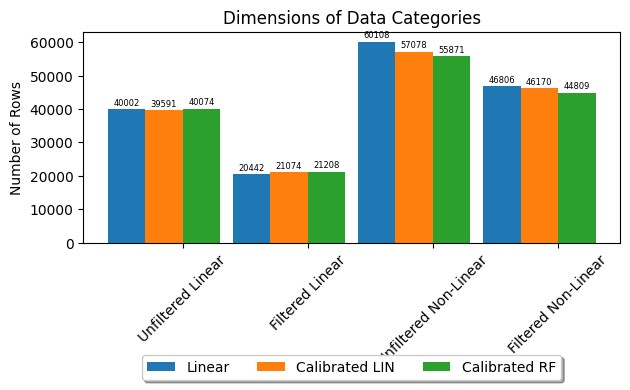

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
linear_unfiltered = [len(df_lin_uncalib_results), len(df_lin_calib_LIN_results), len(df_calib_RF_results)]  # Dimensions of unfiltered linear data
linear_filtered = [len(df_lin_uncalib_results_q), len(df_lin_calib_LIN_results_q), len(df_calib_RF_results_q)]  # Dimensions of filtered linear data
non_linear_unfiltered = [len(df_non_lin_uncalib_results), len(df_non_lin_calib_LIN_results), len(df_non_lin_calib_RF_results)]  # Dimensions of unfiltered non-linear data
non_linear_filtered = [len(df_non_lin_uncalib_results_q), len(df_non_lin_calib_LIN_results_q), len(df_non_lin_calib_RF_results_q)]  # Dimensions of filtered non-linear data

# Define group labels and subgroups
categories = ['Unfiltered Linear', 'Filtered Linear', 'Unfiltered Non-Linear', 'Filtered Non-Linear']
subgroups = ['Linear', 'Calibrated LIN', 'Calibrated RF']

# Define bar positions
bar_width = 0.3
index = np.arange(len(categories))


# Plotting
fig, ax = plt.subplots()

# Plotting bars for each subgroup
for i, subgroup in enumerate(subgroups):
    bars = ax.bar(index + i * bar_width, [linear_unfiltered[i], linear_filtered[i], non_linear_unfiltered[i], non_linear_filtered[i]], bar_width, label=subgroup)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * max(linear_unfiltered + linear_filtered + non_linear_unfiltered + non_linear_filtered), round(yval, 2), ha='center', va='bottom', fontsize=6)

# Set labels, title, and legend
ax.set_ylabel('Number of Rows')
ax.set_title('Dimensions of Data Categories')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

# Move the legend outside the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3)

# Show plot
plt.tight_layout()
plt.show()

In [41]:
df_calib_RF_results_q.head(3)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212_Calibrated...,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.8930,2,25,0,0.0,2.989617,1.506054,90.574402,62.170476,0.0,68.795135,0.329163,0.316625,0.012538,30,12,17,0.68,54.064095,7,-14.058395,3.366141,-324.0,0.00073,0.001382,0.002157,254438610.0,19130256.0
1,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212_Calibrated...,controllerType=0 controllerNumber=1 scan=19398,1,1,2204.8987,2204.8930,2,25,0,0.0,2.546712,1.486419,89.835223,61.566487,0.0,68.121860,0.325942,0.316625,0.009317,29,7,17,0.68,51.852330,5,-11.076755,3.324825,-324.0,0.00073,0.001382,0.002157,685737100.0,48810244.0
2,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212_Calibrated...,controllerType=0 controllerNumber=1 scan=15312,1,1,1909.7885,1909.7827,2,22,0,0.0,3.004162,1.116121,93.914468,59.800188,0.0,58.315502,0.279022,0.309845,0.030824,31,11,11,0.50,67.462900,6,-14.438812,3.319820,-324.0,0.00073,0.001382,0.002157,363671870.0,27556756.0


In [42]:
df_lin_calib_LIN_results_q.head(3)

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212_Calibrated...,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.8930,2,25,0,0.0,2.989617,1.295742,90.574402,62.170476,0.0,68.795135,0.329163,0.318065,0.011098,30,12,17,0.68,54.08571,6,-12.716895,3.567295,-324.0,0.000708,0.001366,0.002139,254438610.0,19130256.0
1,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212_Calibrated...,controllerType=0 controllerNumber=1 scan=19398,1,1,2204.8987,2204.8930,2,25,0,0.0,2.546712,1.447960,89.835223,61.566487,0.0,68.121860,0.325942,0.318065,0.007877,29,7,17,0.68,51.85233,5,-11.076755,3.536219,-324.0,0.000708,0.001366,0.002139,685737100.0,48810244.0
2,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212_Calibrated...,controllerType=0 controllerNumber=1 scan=15312,1,1,1909.7885,1909.7827,2,22,0,0.0,3.004162,1.237310,93.914468,59.800188,0.0,58.315502,0.279022,0.311812,0.032791,31,11,11,0.50,67.46290,5,-12.788019,3.512641,-324.0,0.000708,0.001366,0.002139,363671870.0,27556756.0


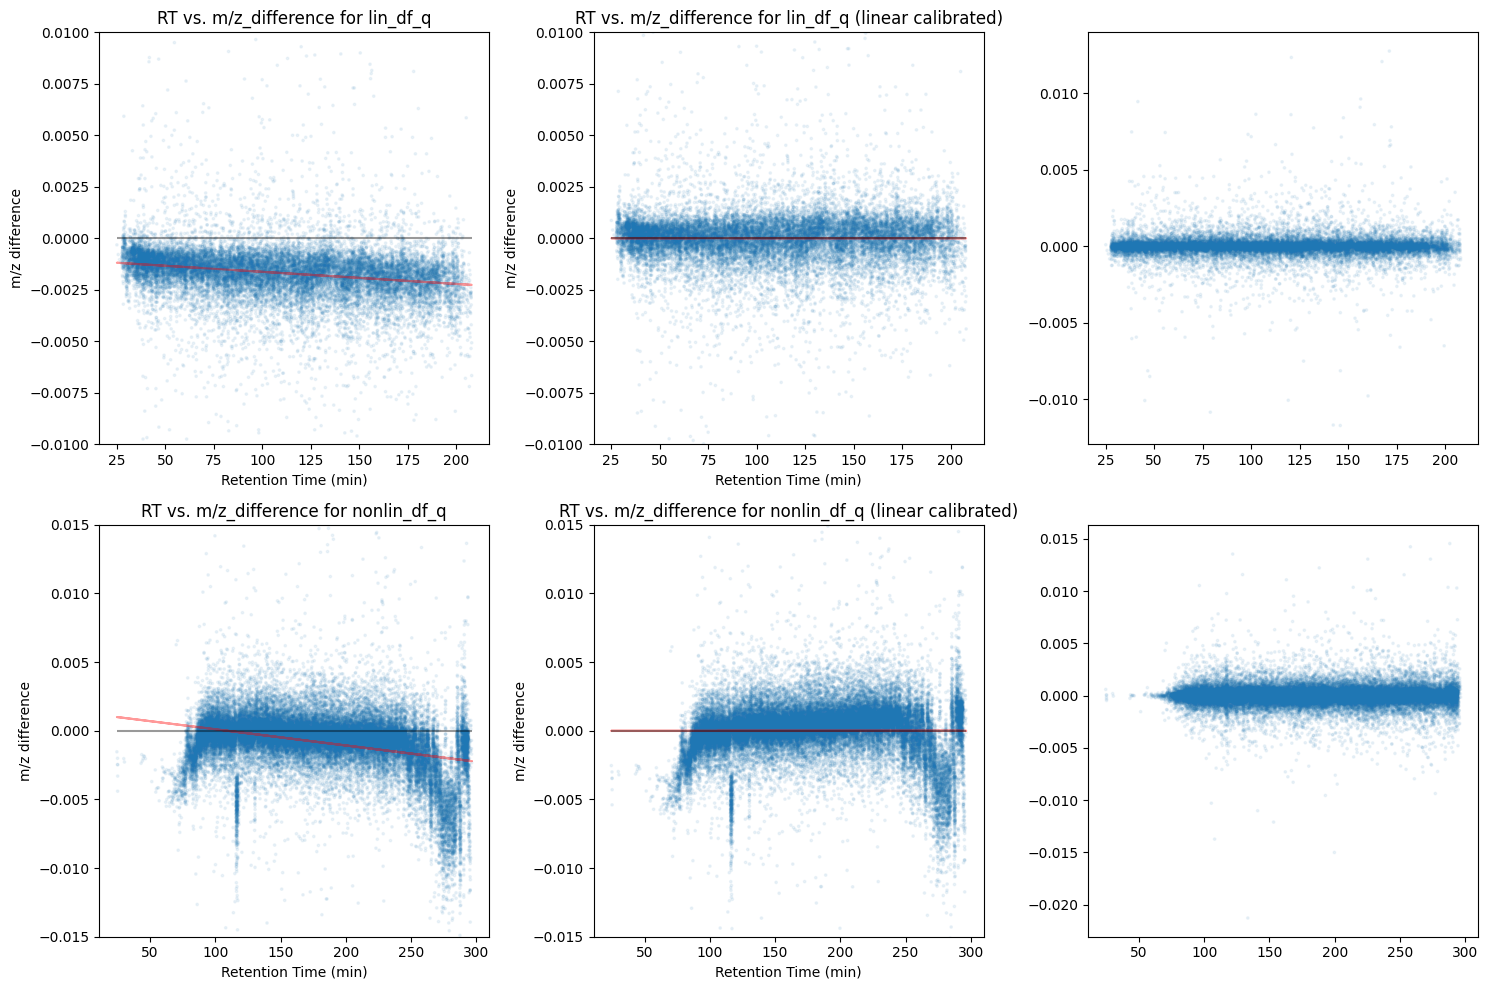

In [76]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 2 columns



# FIRST SUBPLOT (TOP LEFT)
axs[0, 0].scatter(lin_df_q['rt'], lin_df_q['m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3)
x1 = lin_df_q['rt']
y1 = lin_df_q['m/z_difference']
coefficients1 = np.polyfit(x1, y1, 1)
polynomial = np.poly1d(coefficients1)
axs[0, 0].plot(x1, polynomial(x1), color='red', alpha=0.4)

# Get the x-range of the data in the first subplot
x1_range = lin_df_q['rt']

# Add horizontal black line at y=0 with the same x-range as the data in the first subplot
axs[0, 0].hlines(0, min(x1_range), max(x1_range), colors='black', alpha=0.4)

axs[0, 0].set_ylim(-0.01, 0.01)
axs[0, 0].set_xlabel('Retention Time (min)')
axs[0, 0].set_ylabel('m/z difference')
axs[0, 0].set_title('RT vs. m/z_difference for lin_df_q')



# SECOND SUBPLOT (TOP RIGHT)
axs[0, 1].scatter(lin_df_q['rt'], lin_df_q['m/z_difference_adjusted_lin'], marker='o', linestyle='', alpha=0.075, s=3)
x1 = lin_df_q['rt']
y1 = lin_df_q['m/z_difference_adjusted_lin']
coefficients1 = np.polyfit(x1, y1, 1)
polynomial = np.poly1d(coefficients1)
axs[0, 1].plot(x1, polynomial(x1), color='red', alpha=0.4)

# Get the x-range of the data in the second subplot
x2_range = lin_df_q['rt']

# Add horizontal black line at y=0 with the same x-range as the data in the second subplot
axs[0, 1].hlines(0, min(x2_range), max(x2_range), colors='black', alpha=0.4)

axs[0, 1].set_ylim(-0.01, 0.01)
axs[0, 1].set_xlabel('Retention Time (min)')
axs[0, 1].set_ylabel('m/z difference')
axs[0, 1].set_title('RT vs. m/z_difference for lin_df_q (linear calibrated)')

# SUBPLOT LIN RF
axs[0, 2].scatter(lin_df_q['rt'], lin_df_q['m/z_difference_adjusted_RF'], marker='o', linestyle='', alpha=0.075, s=3)

# THIRD SUBPLOT (BOTTOM LEFT)
axs[1, 0].scatter(nonlin_df_q['rt'], nonlin_df_q['m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3)
x3 = nonlin_df_q['rt']
y3 = nonlin_df_q['m/z_difference']
coefficients3 = np.polyfit(x3, y3, 1)
polynomial3 = np.poly1d(coefficients3)
axs[1, 0].plot(x3, polynomial3(x3), color='red', alpha=0.4)

# Get the x-range of the data in the third subplot
x3_range = nonlin_df_q['rt']

# Add horizontal black line at y=0 with the same x-range as the data in the third subplot
axs[1, 0].hlines(0, min(x3_range), max(x3_range), colors='black', alpha=0.4)

axs[1, 0].set_ylim(-0.015, 0.015)
axs[1, 0].set_xlabel('Retention Time (min)')
axs[1, 0].set_ylabel('m/z difference')
axs[1, 0].set_title('RT vs. m/z_difference for nonlin_df_q')



# FOURTH SUBPLOT (BOTTOM RIGHT)
axs[1, 1].scatter(nonlin_df_q['rt'], nonlin_df_q['m/z_difference_adjusted_lin'], marker='o', linestyle='', alpha=0.075, s=3)
x4 = nonlin_df_q['rt']
y4 = nonlin_df_q['m/z_difference_adjusted_lin']
coefficients4 = np.polyfit(x4, y4, 1)
polynomial4 = np.poly1d(coefficients4)
axs[1, 1].plot(x4, polynomial4(x4), color='red', alpha=0.4)

# Get the x-range of the data in the third subplot
x4_range = nonlin_df_q['rt']

# Add horizontal black line at y=0 with the same x-range as the data in the third subplot
axs[1, 1].hlines(0, min(x4_range), max(x4_range), colors='black', alpha=0.4)

axs[1, 1].set_ylim(-0.015, 0.015)
axs[1, 1].set_xlabel('Retention Time (min)')
axs[1, 1].set_ylabel('m/z difference')
axs[1, 1].set_title('RT vs. m/z_difference for nonlin_df_q (linear calibrated)')

# SUBPLOT NONLIN RF
axs[1, 2].scatter(nonlin_df_q['rt'], nonlin_df_q['m/z_difference_adjusted_RF'], marker='o', linestyle='', alpha=0.075, s=3)

plt.tight_layout()
plt.show()